## Importing Libraries

In [1]:
!pip install tensorflow


In [4]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

## Visualizing Single Audio

In [3]:
random_file_name = "./XC175797.ogg"

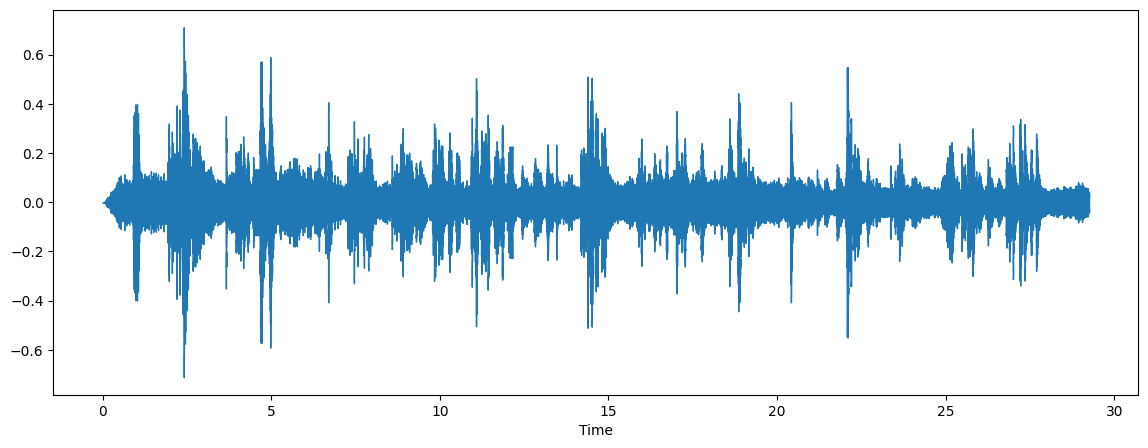

In [4]:
y,sr = librosa.load(random_file_name,sr=44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=sr)

In [5]:
y.shape

(1290241,)

## Playing Sound

In [6]:
from IPython.display import Audio
Audio(data=y,rate=sr)

In [7]:
y

array([ 7.1414320e-08,  1.8030827e-05, -8.8057059e-06, ...,
       -5.6988818e-05, -5.4370412e-05, -2.9570961e-05], dtype=float32)

### Doing Visualization on chunks of Audio

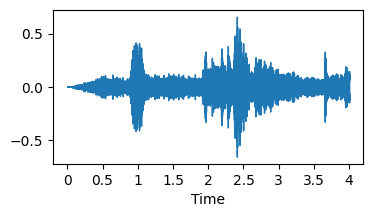

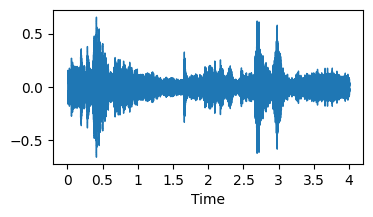

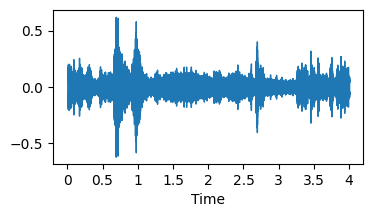

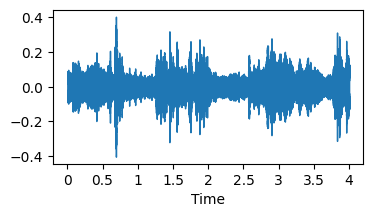

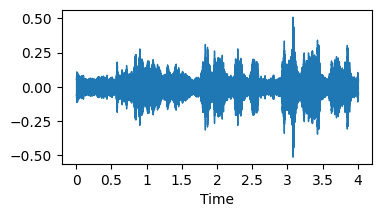

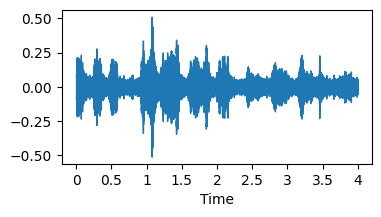

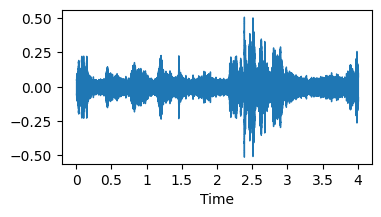

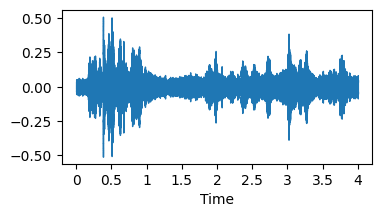

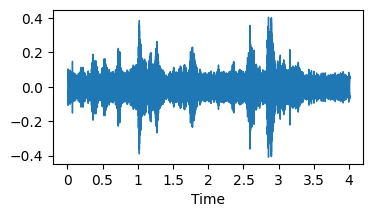

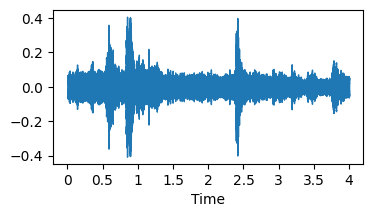

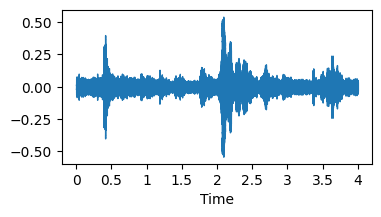

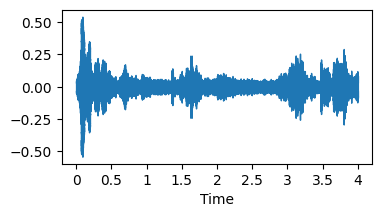

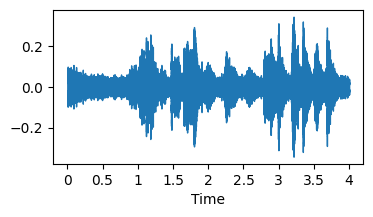

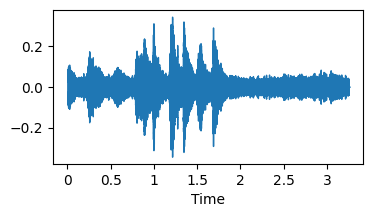

In [8]:
audio_path = "./XC175797.ogg"
y, sr = librosa.load(audio_path, sr=None)  # sr=None to keep the original sampling rate

# Define the duration of each chunk and overlap
chunk_duration = 4  # seconds
overlap_duration = 2  # seconds

# Convert durations to samples
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

# Calculate the number of chunks
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

# Iterate over each chunk
for i in range(num_chunks):
    # Calculate start and end indices of the chunk
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples
    
    # Extract the chunk of audio
    chunk = y[start:end]
    plt.figure(figsize=(4, 2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()
    

## Melspectrogram Visualization

In [14]:
#Plotting Melspectrogram of Entire Audio
def plot_melespectrogram(y,sr):
    #Compute spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y,sr=sr)
    #Convert to decibels (log scale)
    spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
    #Visualize the spectrogram
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar(format='%2.0f dB')
    plt.title("Spectrogram")
    plt.tight_layout()
    plt.show()
    

In [15]:
random_file_name = "./XC175797.ogg"
y,sr = librosa.load(random_file_name,sr=44100)

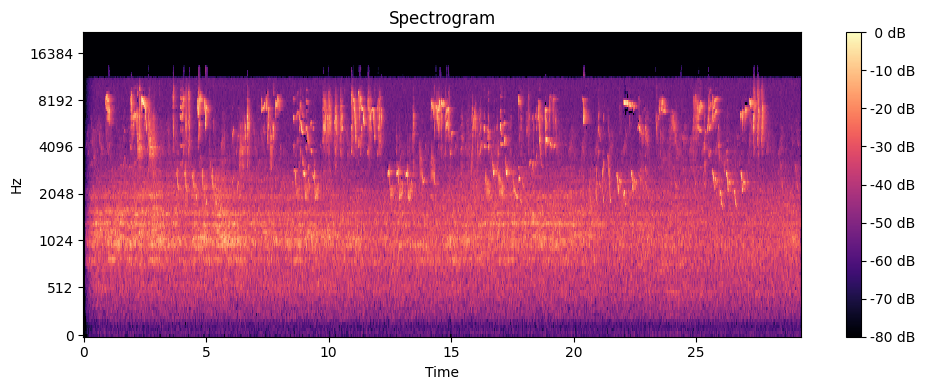

In [16]:
plot_melespectrogram(y,sr)

In [17]:
def plot_melspectrogram_chunks(y,sr):
    #define the duration of each chunk and overlap
    chunk_duration = 4
    overlap_duration = 2
    
    #Convert duration to sample
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr
    
    #Calculate the number of chunks
    num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1
    
    #iterate over each chunks
    for i in range(num_chunks):
        #Calculate start and end indices of the chunk
        start = i*(chunk_samples-overlap_samples)
        end = start+chunk_samples
        #Extract the chunk audio
        chunk = y[start:end]
        #Melspectrogram part
        spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sr)
        print(spectrogram.shape)
        spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
        #Visualize the spectrogram
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%2.0f dB')
        plt.title("Spectrogram")
        plt.tight_layout()
        plt.show()

In [18]:
random_file_name = "./XC175797.ogg"
y,sr = librosa.load(random_file_name,sr=44100)

(128, 345)


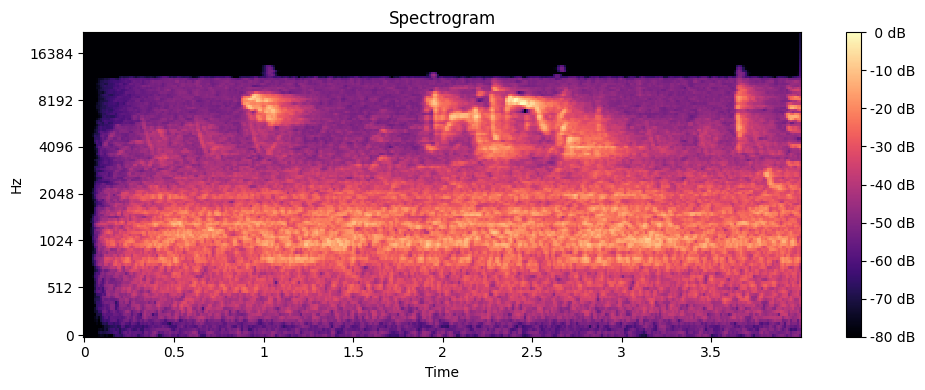

(128, 345)


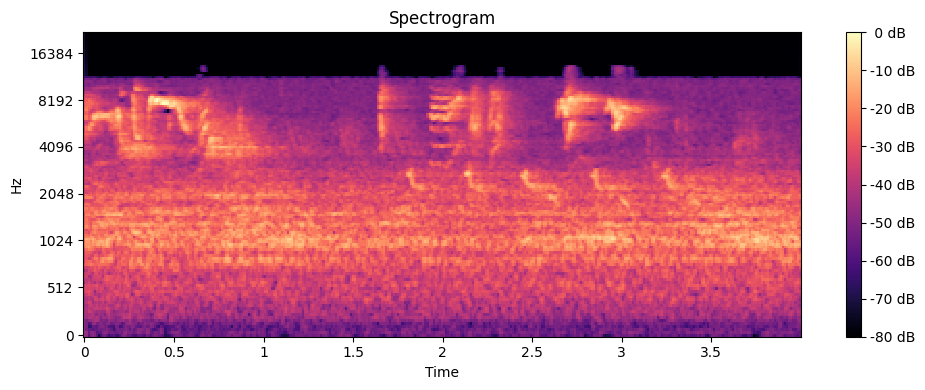

(128, 345)


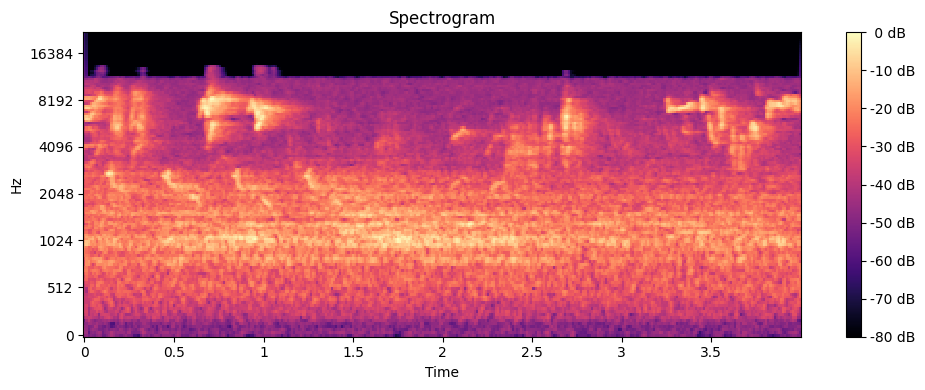

(128, 345)


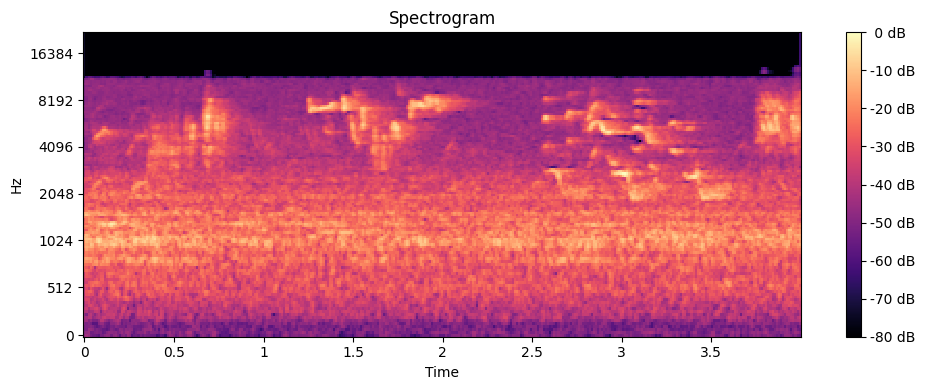

(128, 345)


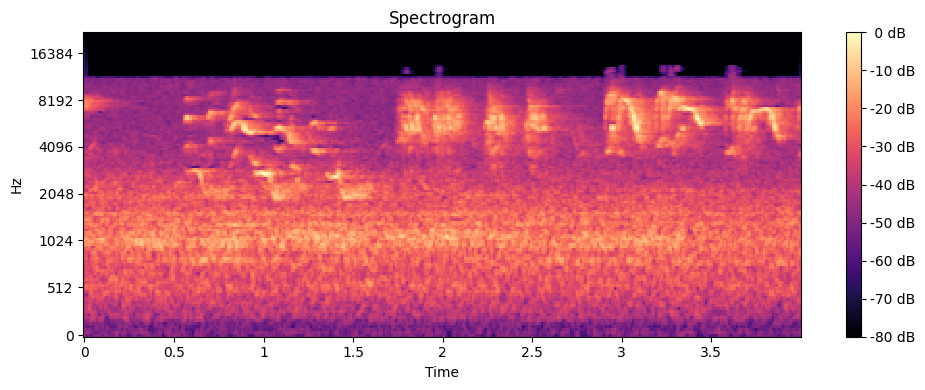

(128, 345)


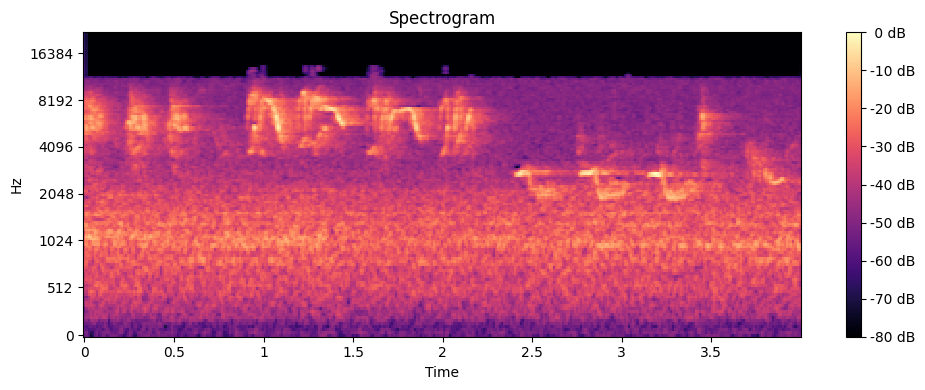

(128, 345)


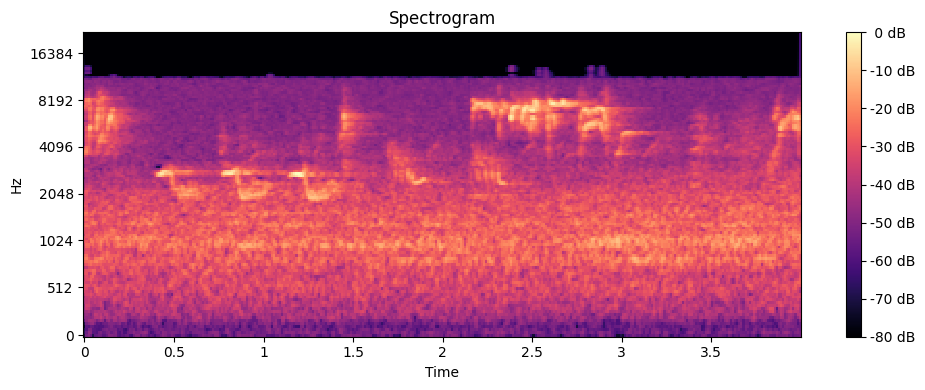

(128, 345)


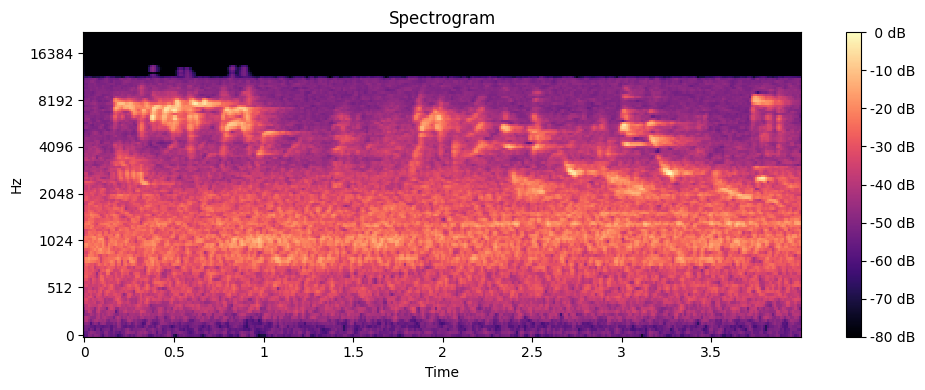

(128, 345)


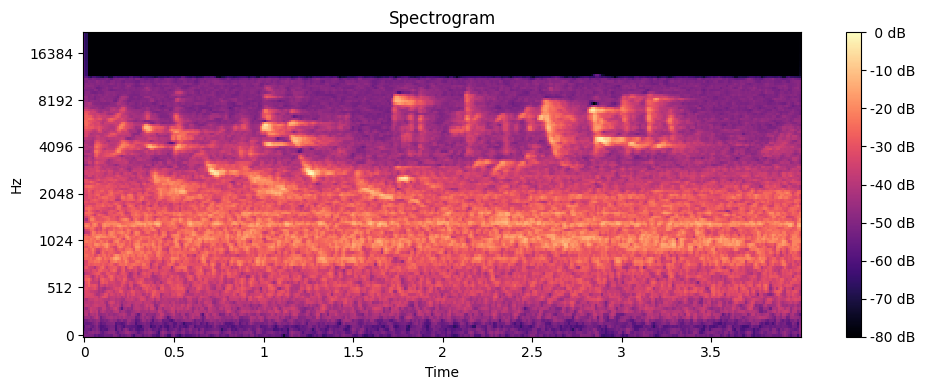

(128, 345)


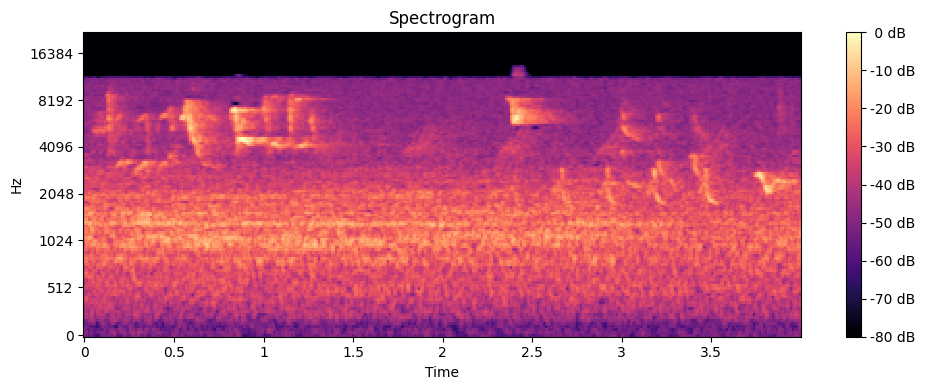

(128, 345)


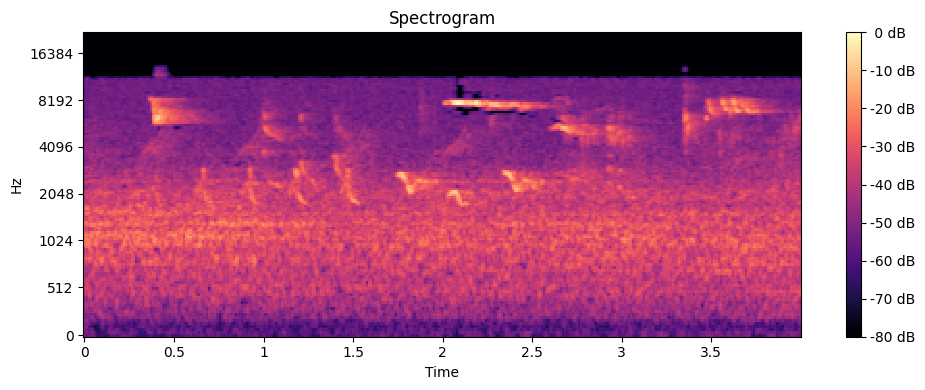

(128, 345)


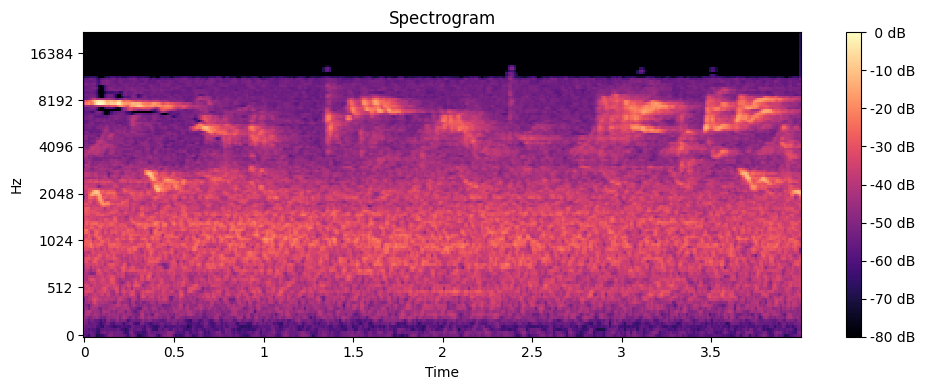

(128, 345)


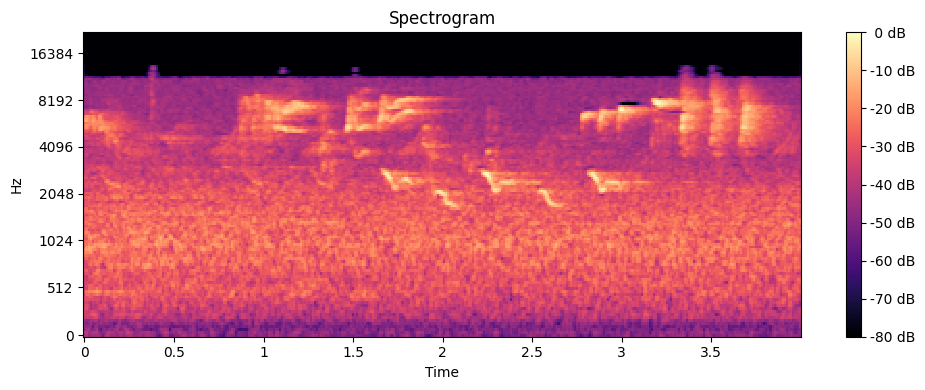

(128, 281)


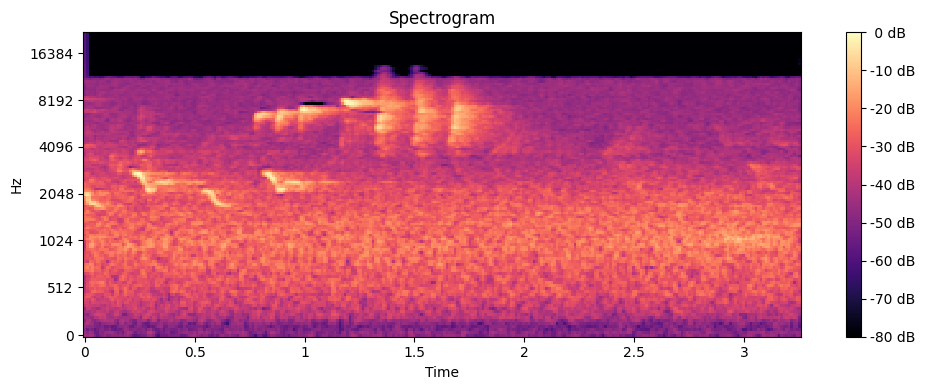

In [19]:
plot_melspectrogram_chunks(y,sr)

In [20]:
128*345

44160

In [21]:
210*210

44100

## Data Preprocessing - Final

In [5]:
#define your folder structure
data_dir = "./train_audio"
classes = ['asbfly', 'ashdro1','ashpri1','ashwoo2','asikoe2','asiope1','aspfly1','aspswi1']

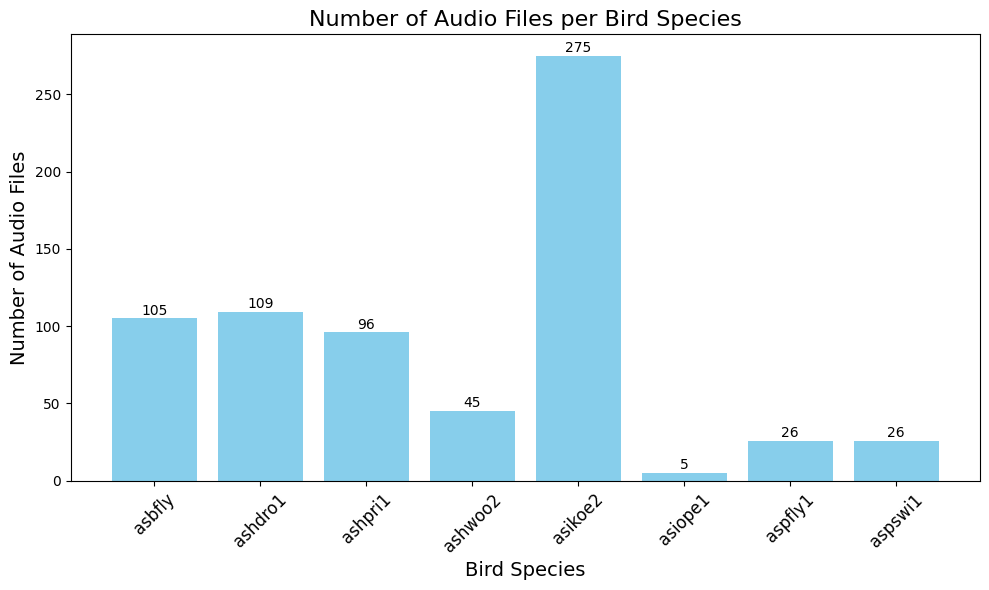

In [10]:
# Count the number of files for each class
class_counts = {}
for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    if os.path.exists(class_path):
        # Count files in the folder
        count = len([file for file in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, file))])
        class_counts[class_name] = count
    else:
        class_counts[class_name] = 0

# Data for the bar chart
labels = list(class_counts.keys())
values = list(class_counts.values())

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color='skyblue')

# Adding counts on top of each bar
for bar in bars:
    yval = bar.get_height()  # Get the height of each bar
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval}", ha='center', va='bottom', fontsize=10, color='black')

# Chart title and labels
plt.title("Number of Audio Files per Bird Species", fontsize=16)
plt.xlabel("Bird Species", fontsize=14)
plt.ylabel("Number of Audio Files", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

In [23]:
from tensorflow.image import resize
#Load and preprocess audio data
def load_and_preprocess_data(data_dir,classes,target_shape=(150,150)):
    data=[]
    labels=[]

    for i_class,class_name in enumerate(classes):
        class_dir = os.path.join(data_dir,class_name)
        print("Processing--",class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.ogg'):
                file_path = os.path.join(class_dir,filename)
                audio_data,sample_rate = librosa.load(file_path,sr=None)
                #Performing Preprocessing
                #define the duration of each chunk and overlap
                chunk_duration = 4
                overlap_duration = 2
                
                #Convert duration to sample
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate
                
                #Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data)-chunk_samples)/(chunk_samples-overlap_samples)))+1
                
                #iterate over each chunks
                for i in range(num_chunks):
                    #Calculate start and end indices of the chunk
                    start = i*(chunk_samples-overlap_samples)
                    end = start+chunk_samples
                    #Extract the chunk audio
                    chunk = audio_data[start:end]
                    #Melspectrogram part
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sample_rate)
                    #Resize matrix based on provided target shape
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram,axis=-1),target_shape)
                    #Append data to list
                    data.append(mel_spectrogram)
                    labels.append(i_class)
    #Return
    return np.array(data),np.array(labels)
    

In [24]:
data,labels = load_and_preprocess_data(data_dir,classes)

Processing-- asbfly
Processing-- ashdro1
Processing-- ashpri1
Processing-- ashwoo2
Processing-- asikoe2
Processing-- asiope1
Processing-- aspfly1
Processing-- aspswi1


In [25]:
data.shape

(12280, 150, 150, 1)

In [26]:
labels.shape

(12280,)

In [27]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels,num_classes = len(classes)) # Converting labels to one-hot encoding
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [28]:
labels.shape

(12280, 8)

## Splitting of Dataset into Training and Test set

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

# Building Model

In [33]:
model = tf.keras.models.Sequential()

In [34]:
X_train[0].shape

(150, 150, 1)

In [35]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [36]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [37]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [38]:
model.add(Dropout(0.3))

In [39]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [40]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [41]:
model.add(Dropout(0.3))

In [42]:
model.add(Flatten())

In [43]:
model.add(Dense(units=1200,activation='relu'))

In [44]:
model.add(Dropout(0.45))

In [45]:
#Output layer
model.add(Dense(units=len(classes),activation='softmax'))

In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 74, 74, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 34, 34, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 17, 17, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 15, 15, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1200)                │       2,458,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           9,608 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 7,180,056 (27.39 MB)

 Trainable params: 7,180,056 (27.39 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
#Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [48]:
#Training Model
training_history = model.fit(X_train,Y_train,epochs=30,batch_size=32,validation_data=(X_test,Y_test)) 

Epoch 1/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 1068s 3s/step - accuracy: 0.4863 - loss: 1.5221 - val_accuracy: 0.6050 - val_loss: 1.1572
Epoch 2/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 957s 3s/step - accuracy: 0.6310 - loss: 1.0698 - val_accuracy: 0.6881 - val_loss: 0.9269
Epoch 3/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 994s 3s/step - accuracy: 0.6914 - loss: 0.9238 - val_accuracy: 0.7166 - val_loss: 0.8635
Epoch 4/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 991s 3s/step - accuracy: 0.7217 - loss: 0.8290 - val_accuracy: 0.7378 - val_loss: 0.7636
Epoch 5/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 1048s 3s/step - accuracy: 0.7343 - loss: 0.7871 - val_accuracy: 0.7541 - val_loss: 0.7342
Epoch 6/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 1205s 4s/step - accuracy: 0.7634 - loss: 0.6961 - val_accuracy: 0.7687 - val_loss: 0.6952
Epoch 7/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 1214s 4s/step - accuracy: 0.7938 - loss: 0.6241 - val_accuracy: 0.7858 - val_loss: 0.6220
Epoch 8/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 1224s 4s/step - accuracy: 0.8116 - loss: 0.5711 - val

In [54]:
# model.save("Trained_model.h5") #Windows
model.save("Trained_model.keras")

In [20]:
training_history.history

NameError: name 'training_history' is not defined

In [21]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

NameError: name 'training_history' is not defined

In [22]:
X_train

NameError: name 'X_train' is not defined

In [24]:
#Reloading model variable
model = tf.keras.models.load_model("Trained_model.keras")
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 74, 74, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 34, 34, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 17, 17, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 15, 15, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1200)                │       2,458,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           9,608 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,360,114 (54.78 MB)

 Trainable params: 7,180,056 (27.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,180,058 (27.39 MB)

In [25]:
#Reloading Training history
import json
with open("training_hist.json",'r') as json_file:
    training_history_data = json.load(json_file)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [17]:
training_history_data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## Model Evaluation - I

In [18]:
#Model evaluation on Training set
train_loss,train_accuracy = model.evaluate(X_train,Y_train)

NameError: name 'X_train' is not defined

In [62]:
train_loss,train_accuracy

(0.03510971739888191, 0.9894136786460876)

In [63]:
#Model evaluation on Validation set
val_loss,val_accuracy = model.evaluate(X_test,Y_test)

77/77 ━━━━━━━━━━━━━━━━━━━━ 72s 919ms/step - accuracy: 0.9147 - loss: 0.4483


In [64]:
val_loss,val_accuracy

(0.535966157913208, 0.9079804420471191)

In [65]:
training_history_data['val_loss']

[1.1572469472885132,
 0.9268696308135986,
 0.8634576201438904,
 0.76364666223526,
 0.7341887950897217,
 0.6951531767845154,
 0.6219935417175293,
 0.6325952410697937,
 0.5680140256881714,
 0.5139024257659912,
 0.5112873911857605,
 0.48575931787490845,
 0.4510364830493927,
 0.40080851316452026,
 0.5416115522384644,
 0.43087613582611084,
 0.3879106342792511,
 0.41124269366264343,
 0.41985368728637695,
 0.43960073590278625,
 0.37576285004615784,
 0.49443507194519043,
 0.4075535535812378,
 0.4570311903953552,
 0.49955570697784424,
 0.4271724224090576,
 0.42029353976249695,
 0.4728606641292572,
 0.4247722923755646,
 0.535966157913208]

## Accuracy and Loss Visualization

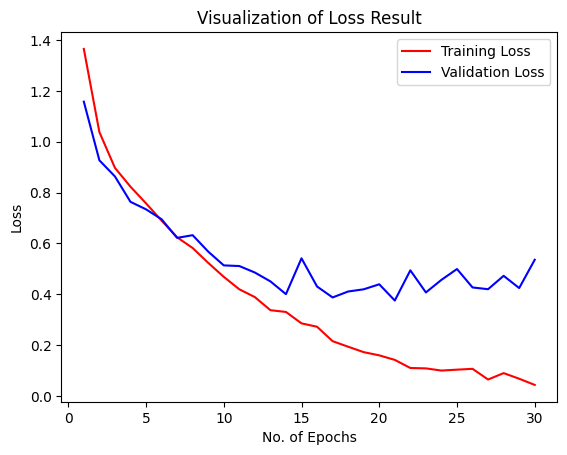

In [66]:
#Visualization of Loss
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['loss'],label="Training Loss",color='red')
plt.plot(epochs,training_history_data['val_loss'],label="Validation Loss",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

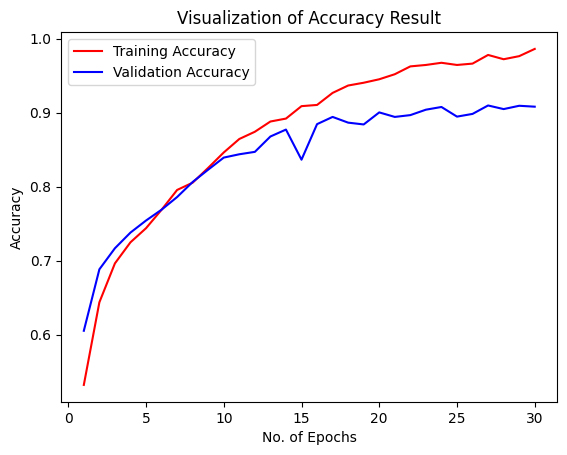

In [67]:
#Visualization of Accuracy
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['accuracy'],label="Training Accuracy",color='red')
plt.plot(epochs,training_history_data['val_accuracy'],label="Validation Accuracy",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Precision,Recall,Confusion Matrix - Model Evaluation-II

In [14]:
X_test.shape

NameError: name 'X_test' is not defined

In [69]:
y_pred = model.predict(X_test)
y_pred

77/77 ━━━━━━━━━━━━━━━━━━━━ 71s 921ms/step


array([[1.15901666e-22, 1.17193554e-31, 1.00000000e+00, ...,
        0.00000000e+00, 5.03182582e-32, 5.54153723e-24],
       [3.34211714e-10, 9.99999762e-01, 2.27337843e-13, ...,
        3.92450759e-11, 3.50058538e-10, 4.51093698e-13],
       [9.99890924e-01, 9.47371159e-09, 1.08626584e-04, ...,
        8.76740351e-16, 9.35990618e-10, 5.08444657e-07],
       ...,
       [1.08360057e-03, 1.44523407e-08, 9.98902559e-01, ...,
        8.25008519e-13, 2.01870720e-09, 1.37838197e-05],
       [1.04293047e-22, 1.00000000e+00, 3.90103052e-22, ...,
        1.26873000e-26, 4.93371202e-24, 1.56982247e-22],
       [2.96850107e-04, 1.07863110e-04, 9.99329567e-01, ...,
        3.29727423e-09, 2.62705580e-04, 7.75507480e-09]], dtype=float32)

In [70]:
y_pred.shape

(2456, 8)

In [71]:
predicted_categories = np.argmax(y_pred,axis=1)
predicted_categories

array([2, 1, 0, ..., 2, 1, 2])

In [72]:
Y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [73]:
Y_test.shape

(2456, 8)

In [74]:
true_categories = np.argmax(Y_test,axis=1)
true_categories

array([2, 1, 0, ..., 2, 1, 2])

In [75]:
classes

['asbfly',
 'ashdro1',
 'ashpri1',
 'ashwoo2',
 'asikoe2',
 'asiope1',
 'aspfly1',
 'aspswi1']

In [13]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
# Precision Recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

NameError: name 'true_categories' is not defined

## Confusion Matrix Visualization

In [12]:
cm

NameError: name 'cm' is not defined

In [11]:
import seaborn as sns
plt.figure(figsize=(1,1))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Bird Species Classification Confusion Matrix",fontsize=15)
plt.show()

NameError: name 'cm' is not defined

<Figure size 100x100 with 0 Axes>